In [13]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import *
# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
from math import *

In [3]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# Oracle

In [4]:
def oracle(grover_circuit, find_me):
    find_me = find_me[::-1]
    print(find_me)
    for i in range(len(find_me)):
        if find_me[i] == '0':
            grover_circuit.x(i)
        else:
            pass
    #cccz begin
    grover_circuit.barrier([0, 1, 2,3])
    grover_circuit.cp(pi/4, 0, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cp(-pi/4, 1, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cp(pi/4, 1, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cp(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cp(pi/4, 2, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cp(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cp(pi/4, 2, 3)
    #cccz end
    grover_circuit.barrier([0, 1, 2,3])
    for i in range(len(find_me)):
        if find_me[i] == '0':
            grover_circuit.x(i)
            print(i)
        else:
            pass
    return grover_circuit

In [5]:
n = 4
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
oracle(grover_circuit, '0100')

0010
0
1
3


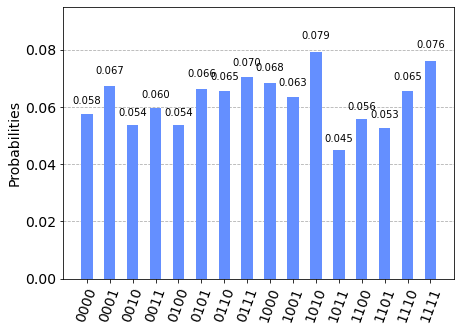

In [6]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

# Amplification

In [7]:
def diffuser(grover_circuit):
    grover_circuit.barrier([0, 1, 2,3])
    for q in range(4):
        grover_circuit.h(q)
        grover_circuit.x(q)
    #begin cccz
    
    grover_circuit.barrier([0, 1, 2,3])
    grover_circuit.cp(pi/4, 0, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cp(-pi/4, 1, 3)
    grover_circuit.cx(0, 1)
    grover_circuit.cp(pi/4, 1, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cp(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cp(pi/4, 2, 3)
    grover_circuit.cx(1, 2)
    grover_circuit.cp(-pi/4, 2, 3)
    grover_circuit.cx(0, 2)
    grover_circuit.cp(pi/4, 2, 3)
    grover_circuit.draw()
    #end cccz
    grover_circuit.barrier([0, 1, 2,3])
    for q in range(4):
        grover_circuit.x(q)
        grover_circuit.h(q)
    return grover_circuit

In [8]:
def grover(find_me):
    n = 4
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
    N = 2**4
    k = 1
    r = floor((pi/4)*sqrt(N/k))
    for num in range(r):
        grover_circuit = oracle(grover_circuit, find_me)
        grover_circuit = diffuser(grover_circuit)
    return grover_circuit   

In [9]:
grover_circuit = grover('0100')
grover_circuit.draw()

0010
0
1
3
0010
0
1
3
0010
0
1
3


┌───┐┌───┐ ░                                                          »
q_0: ┤ H ├┤ X ├─░─────■───────■───────────────■────────────────────────────»
     ├───┤├───┤ ░     │     ┌─┴─┐           ┌─┴─┐                          »
q_1: ┤ H ├┤ X ├─░─────┼─────┤ X ├─────■─────┤ X ├────■───────■─────────────»
     ├───┤└───┘ ░     │     └───┘     │     └───┘    │     ┌─┴─┐           »
q_2: ┤ H ├──────░─────┼───────────────┼──────────────┼─────┤ X ├─────■─────»
     ├───┤┌───┐ ░ ┌───┴────┐     ┌────┴────┐     ┌───┴────┐└───┘┌────┴────┐»
q_3: ┤ H ├┤ X ├─░─┤ P(π/4) ├─────┤ P(-π/4) ├─────┤ P(π/4) ├─────┤ P(-π/4) ├»
     └───┘└───┘ ░ └────────┘     └─────────┘     └────────┘     └─────────┘»
«                                                    ░ ┌───┐ ░ ┌───┐┌───┐ ░ »
«q_0: ──■──────────────────────────────■─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«       │                              │             ░ ├───┤ ░ ├───┤├───┤ ░ »
«q_1: ──┼──────────────■───────────────┼─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─»
«     ┌─┴─┐          ┌─┴─┐           ┌─┴─┐           ░ └───┘ ░ ├───┤├───┤ ░ »
«q_2: ┤ X ├────■─────┤ X ├─────■─────┤ X ├────■──────░───────░─┤ H ├┤ X ├─░─»
«     └───┘┌───┴────┐└───┘┌────┴────┐└───┘┌───┴────┐ ░ ┌───┐ ░ ├───┤├───┤ ░ »
«q_3: ─────┤ P(π/4) ├─────┤ P(-π/4) ├─────┤ P(π/4) ├─░─┤ X ├─░─┤ H ├┤ X ├─░─»
«          └────────┘     └─────────┘     └────────┘ ░ └───┘ ░ └───┘└───┘ ░ »
«                                                                             »
«q_0: ────■───────■───────────────■──────────────────────────────■────────────»
«         │     ┌─┴─┐           ┌─┴─┐                            │            »
«q_1: ────┼─────┤ X ├─────■─────┤ X ├────■───────■───────────────┼────────────»
«         │     └───┘     │     └───┘    │     ┌─┴─┐           ┌─┴─┐          »
«q_2: ────┼───────────────┼──────────────┼─────┤ X ├─────■─────┤ X ├────■─────»
«     ┌───┴────┐     ┌────┴────┐     ┌───┴────┐└───┘┌────┴────┐└───┘┌───┴────┐»
«q_3: ┤ P(π/4) ├─────┤ P(-π/4) ├─────┤ P(π/4) ├─────┤ P(-π/4) ├─────┤ P(π/4) ├»
«     └────────┘     └─────────┘     └────────┘     └─────────┘     └────────┘»
«                                     ░ ┌───┐┌───┐┌───┐ ░                »
«q_0: ──────────────────■─────────────░─┤ X ├┤ H ├┤ X ├─░─────■───────■──»
«                       │             ░ ├───┤├───┤├───┤ ░     │     ┌─┴─┐»
«q_1: ──■───────────────┼─────────────░─┤ X ├┤ H ├┤ X ├─░─────┼─────┤ X ├»
«     ┌─┴─┐           ┌─┴─┐           ░ ├───┤├───┤└───┘ ░     │     └───┘»
«q_2: ┤ X ├─────■─────┤ X ├────■──────░─┤ X ├┤ H ├──────░─────┼──────────»
«     └───┘┌────┴────┐└───┘┌───┴────┐ ░ ├───┤├───┤┌───┐ ░ ┌───┴────┐     »
«q_3: ─────┤ P(-π/4) ├─────┤ P(π/4) ├─░─┤ X ├┤ H ├┤ X ├─░─┤ P(π/4) ├─────»
«          └─────────┘     └────────┘ ░ └───┘└───┘└───┘ ░ └────────┘     »
«                                                                              »
«q_0: ─────────────■──────────────────────────────■────────────────────────────»
«                ┌─┴─┐                            │                            »
«q_1: ─────■─────┤ X ├────■───────■───────────────┼──────────────■─────────────»
«          │     └───┘    │     ┌─┴─┐           ┌─┴─┐          ┌─┴─┐           »
«q_2: ─────┼──────────────┼─────┤ X ├─────■─────┤ X ├────■─────┤ X ├─────■─────»
«     ┌────┴────┐     ┌───┴────┐└───┘┌────┴────┐└───┘┌───┴────┐└───┘┌────┴────┐»
«q_3: ┤ P(-π/4) ├─────┤ P(π/4) ├─────┤ P(-π/4) ├─────┤ P(π/4) ├─────┤ P(-π/4) ├»
«     └─────────┘     └────────┘     └─────────┘     └────────┘     └─────────┘»
«                     ░ ┌───┐ ░ ┌───┐┌───┐ ░                                »
«q_0: ──■─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─────■───────■───────────────■──»
«       │             ░ ├───┤ ░ ├───┤├───┤ ░     │     ┌─┴─┐           ┌─┴─┐»
«q_1: ──┼─────────────░─┤ X ├─░─┤ H ├┤ X ├─░─────┼─────┤ X ├─────■─────┤ X ├»
«     ┌─┴─┐           ░ └───┘ ░ ├───┤├───┤ ░     │     └───┘     │     └───┘»
«q_2: ┤ X ├────■──────░───────░─┤ H ├┤ X ├─░─────┼───────────────┼──────────»
«     └───┘┌───┴──

In [10]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()

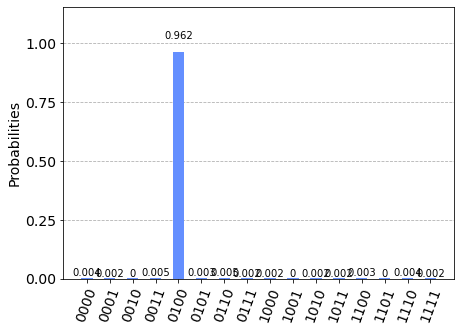

In [11]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [14]:
editor = CircuitComposer(circuit=grover_circuit)
editor

NameError: name 'CircuitComposer' is not defined